In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import (YEARLY, DateFormatter,
                              rrulewrapper, RRuleLocator, drange)

from sklearn.preprocessing import MinMaxScaler


In [26]:
#!wget https://raw.githubusercontent.com/JasonMorris1/CSE151_Tesla_Stock_Prediction/main/tsla_2014_2023.csv
df = pd.read_csv('tsla_2014_2023.csv')
df['date']=pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df = df.drop(columns=['open', 'high', 'low']) # not sure why we do this
df.set_index('date')
#note I didn't drop other columns
df= df[(df.year>2019)]


df['ma21'] = df['close'].rolling(window=21).mean()

df['bollinger_upper'] = df['ma21'] + 2 * df['close'].rolling(window=21).std()
df['bollinger_lower'] = df['ma21'] - 2 * df['close'].rolling(window=21).std()

df.head()



,date,close,volume,rsi_7,rsi_14,cci_7,cci_14,sma_50,ema_50,sma_100,...,macd,bollinger,TrueRange,atr_7,atr_14,next_day_close,year,ma21,bollinger_upper,bollinger_lower
1510,2020-01-02,28.684000,142981500,75.167317,75.726621,56.116206,80.405463,23.386373,23.544569,19.545007,...,1.671410,25.635933,0.824667,0.916054,0.833828,29.534000,2020,NaN,NaN,NaN
1511,2020-01-03,29.534000,266677500,80.428867,78.627411,156.979807,124.434060,23.636280,23.779449,19.687673,...,1.731141,26.002533,1.582666,1.011285,0.887317,30.102667,2020,NaN,NaN,NaN
1512,2020-01-06,30.102667,151995000,83.206184,80.321736,126.841240,129.079563,23.898760,24.027418,19.832033,...,1.803574,26.406433,0.770668,0.976911,0.878985,31.270666,2020,NaN,NaN,NaN
1513,2020-01-07,31.270666,268231500,87.467753,83.257545,133.929473,170.355315,24.124600,24.311467,19.998327,...,1.932944,26.850333,1.339332,1.028685,0.911867,32.809334,2020,NaN,NaN,NaN
1514,2020-01-08,32.809334,467164500,90.984023,86.182158,142.592608,202.850274,24.343280,24.644717,20.182660,...,2.135017,27.359033,2.017332,1.169920,0.990828,32.089333,2020,NaN,NaN,NaN


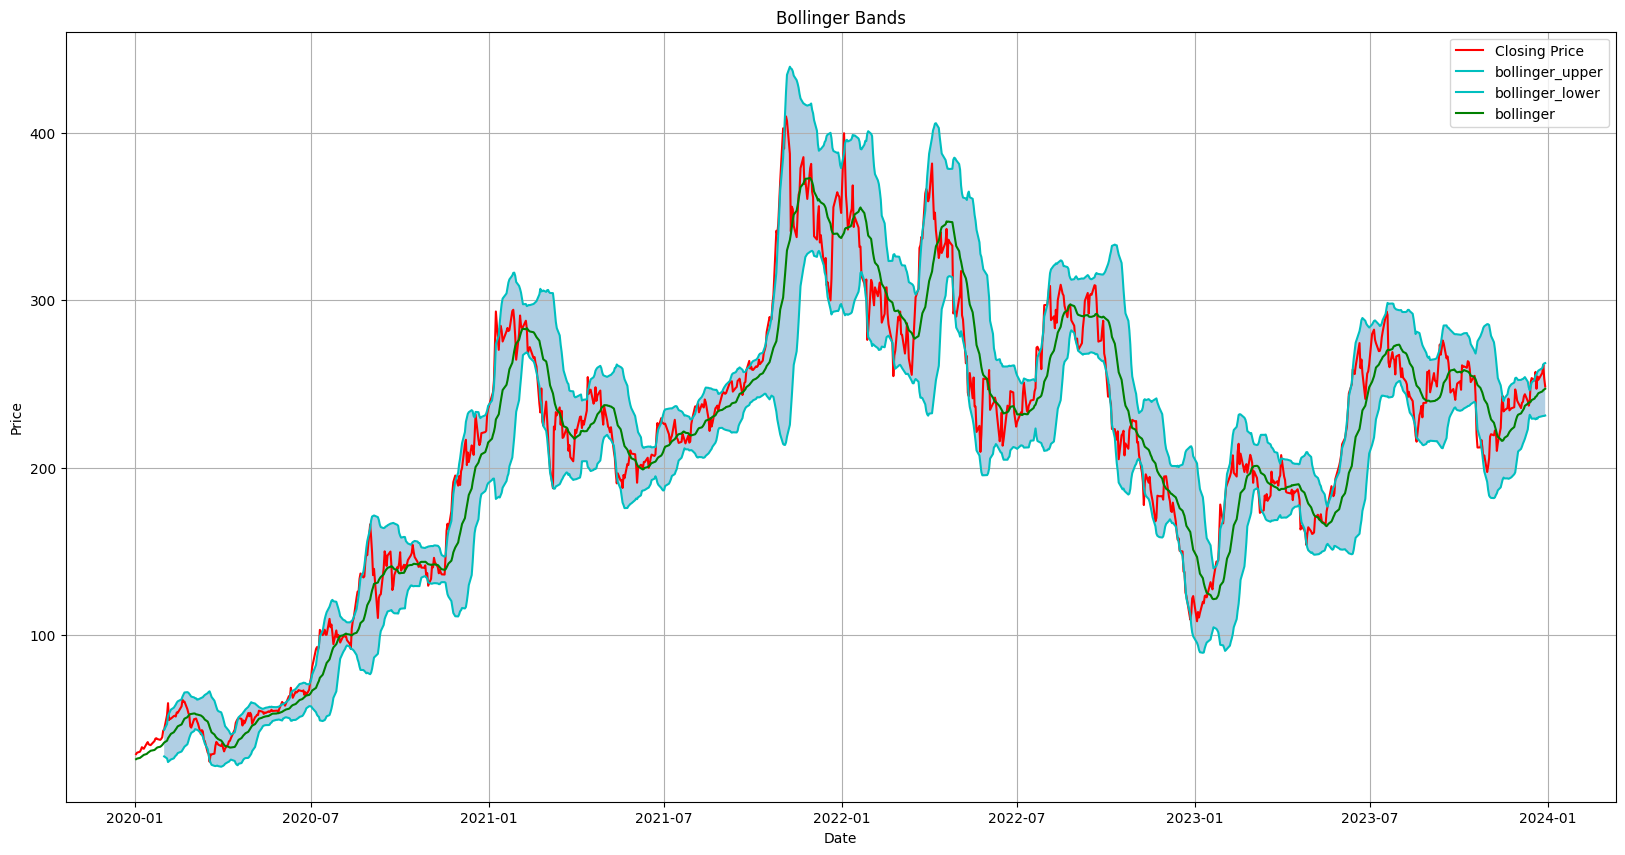

In [25]:
plt.figure(figsize=(20,10))

plt.plot(df['date'], df['close'],label='Closing Price', color='r')

plt.plot(df['date'], df['bollinger_upper'],label='bollinger_upper', color='c')
plt.plot(df['date'], df['bollinger_lower'],label='bollinger_lower', color='c')
plt.plot(df['date'], df['bollinger'],label='bollinger', color='g')
plt.fill_between(df['date'], df['bollinger_lower'], df['bollinger_upper'], alpha=0.35)


plt.title('Bollinger Bands')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)





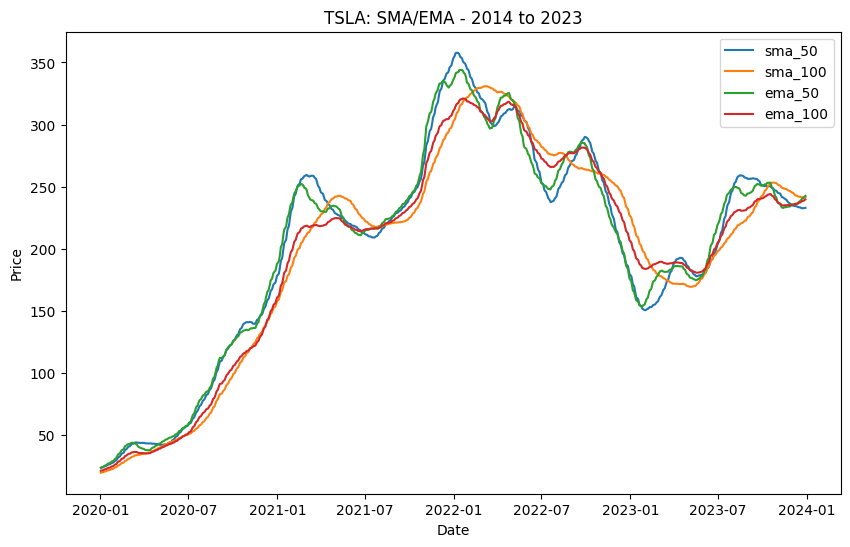

In [20]:




plt.figure(figsize=(10, 6))
plt.plot(df['date'], df['sma_50'], label= 'sma_50')
plt.plot(df['date'], df['sma_100'], label = 'sma_100')
plt.plot(df['date'], df['ema_50'],  label = 'ema_50')
plt.plot(df['date'], df['ema_100'], label = 'ema_100')


# fig.set_figheight(6)
# fig.set_figwidth(15)
# df
# 
# [['sma_50','sma_100','ema_50','ema_100']].plot(x= df['date'], ax=axes)
plt.title('TSLA: SMA/EMA - 2014 to 2023')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

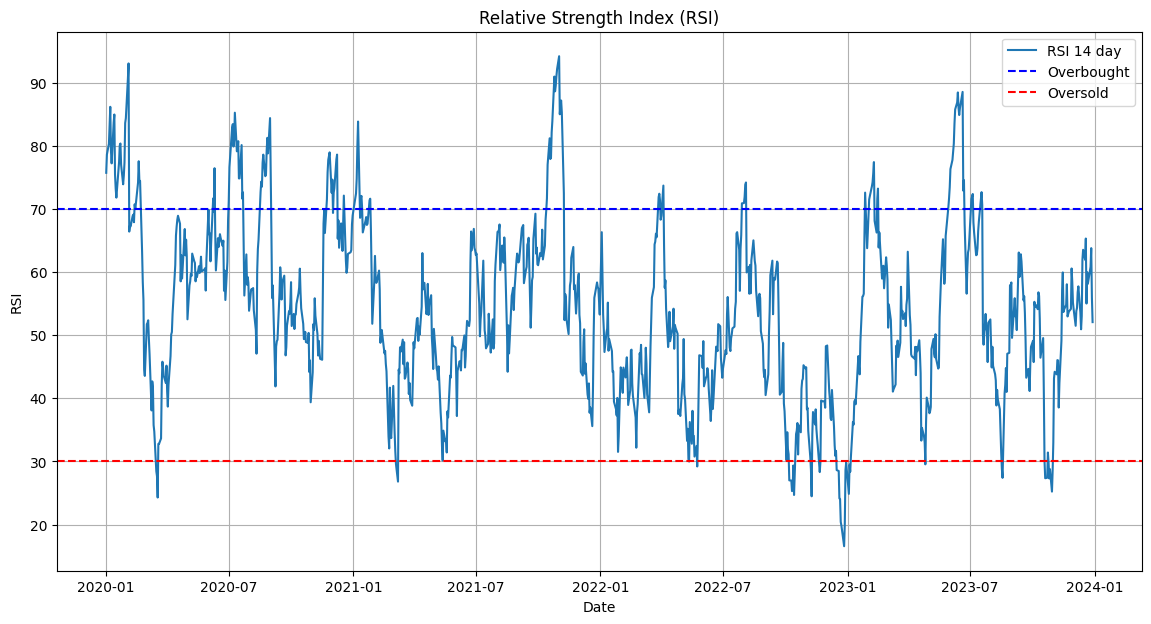

In [32]:
plt.figure(figsize=(14,7))
plt.plot(df['date'], df['rsi_14'], label='RSI 14 day')
plt.axhline(y=70, color='b', linestyle='--', label='Overbought')
plt.axhline(y=30, color='r', linestyle='--', label='Oversold')
plt.title('Relative Strength Index (RSI)')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend()
plt.grid(True)
plt.show()